In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis (EDA) and visualization

In [50]:
df= pd.read_csv('iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [54]:
df.describe(include='all')

sepal_length  sepal_width  petal_length  petal_width species
count     150.000000   150.000000    150.000000   150.000000     150
unique           NaN          NaN           NaN          NaN       3
top              NaN          NaN           NaN          NaN  setosa
freq             NaN          NaN           NaN          NaN      50
mean        5.843333     3.054000      3.758667     1.198667     NaN
std         0.828066     0.433594      1.764420     0.763161     NaN
min         4.300000     2.000000      1.000000     0.100000     NaN
25%         5.100000     2.800000      1.600000     0.300000     NaN
50%         5.800000     3.000000      4.350000     1.300000     NaN
75%         6.400000     3.300000      5.100000     1.800000     NaN
max         7.900000     4.400000      6.900000     2.500000     NaN

In [82]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species', ylabel='count'>

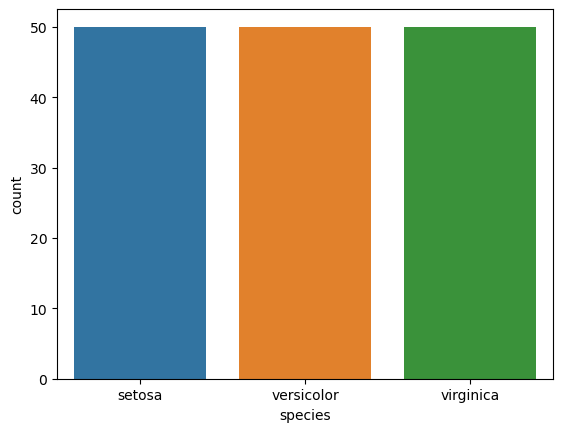

In [60]:
sns.countplot(x=df['species'] , hue=df['species'])

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

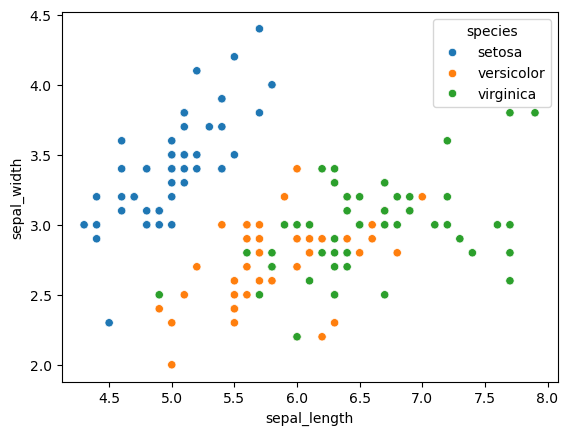

In [62]:
sns.scatterplot(x=df['sepal_length'] , y=df['sepal_width'] , hue=df['species'])

<Axes: xlabel='petal_length', ylabel='petal_width'>

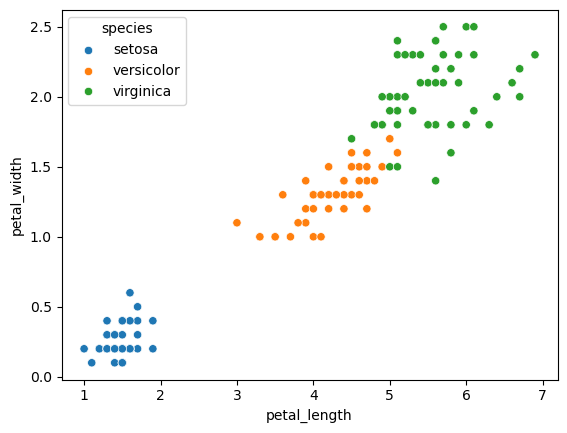

In [66]:
sns.scatterplot(x=df['petal_length'], y=df['petal_width'] , hue=df['species'])

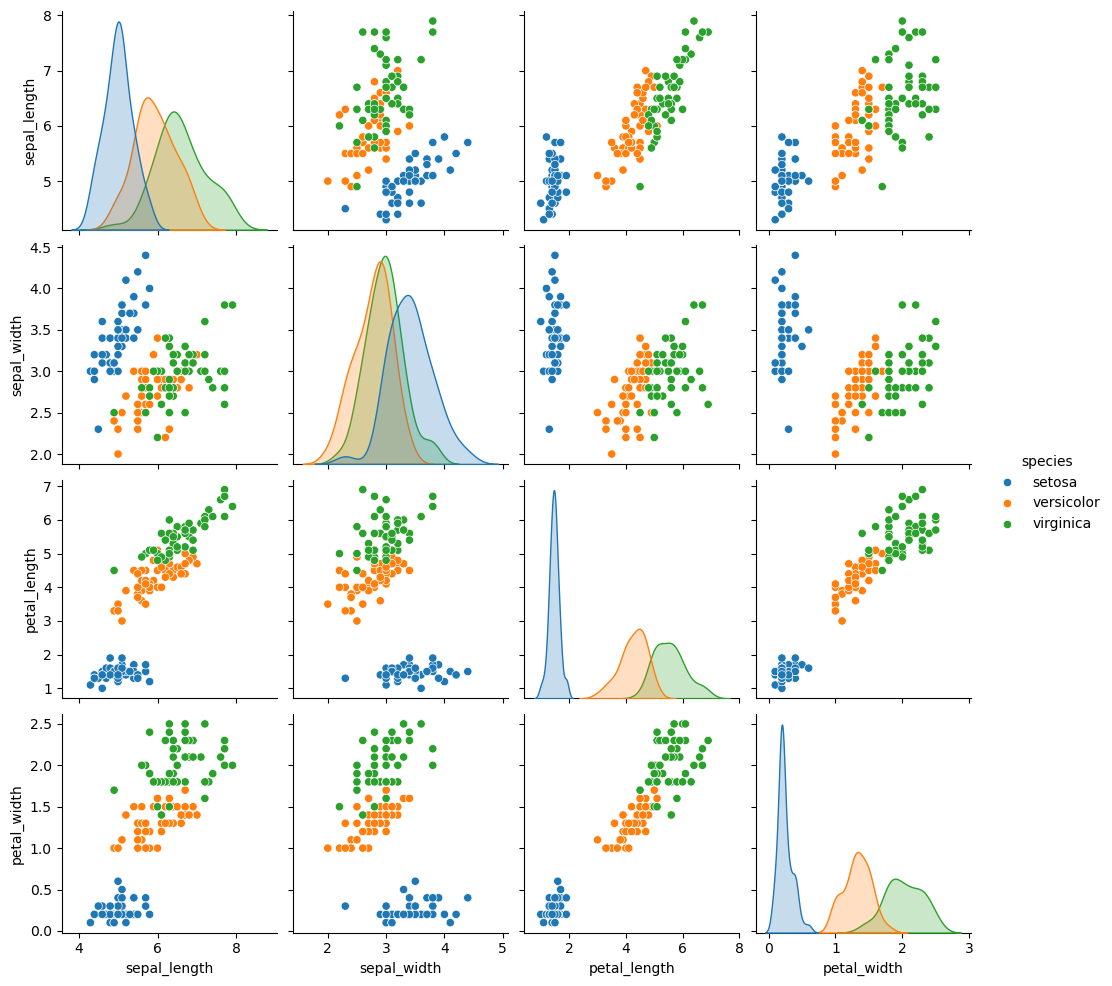

In [76]:
sns.pairplot(data=df , hue='species')

<Axes: >

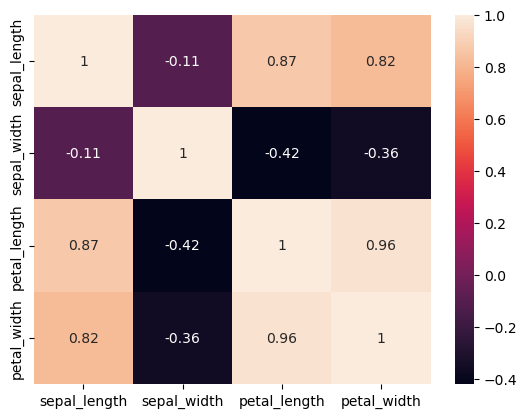

In [80]:
sns.heatmap(df.corr(numeric_only=True) , annot=True)

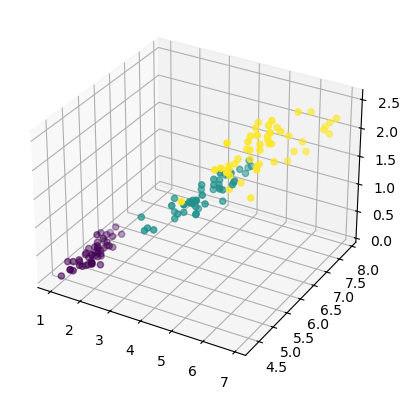

In [90]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111 , projection='3d')
colors=df['species'].map({'setosa':0 , 'versicolor':1, 'virginica' :2})
ax.scatter(df['petal_length'] , df['sepal_length'] , df['petal_width']  ,c=colors)

# train _ test split & scaling

In [95]:
X= df.drop('species' , axis=1)
y=df['species']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

# multi class logestic regression model

In [5]:
from sklearn.linear_model import LogisticRegression
base_log_model=LogisticRegression(solver='saga' , multi_class='ovr', max_iter=5000)

In [11]:
# cپارامتر ضریب پنالتی است
from sklearn.model_selection import GridSearchCV
penalty=['l1' , 'l2']
c=np.logspace(0 , 4 , 10)
grid_model=GridSearchCV(base_log_model , param_grid={'C' : c , 'penalty': penalty})

In [108]:
grid_model.fit(X_train , y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [112]:
grid_model.best_params_

{'C': 7.742636826811269, 'penalty': 'l1'}

In [116]:
grid_model.best_score_

0.9458498023715414

# Evaluating of model

In [121]:
from sklearn.metrics import classification_report , ConfusionMatrixDisplay

In [123]:
y_pred=grid_model.predict(X_test)

In [127]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



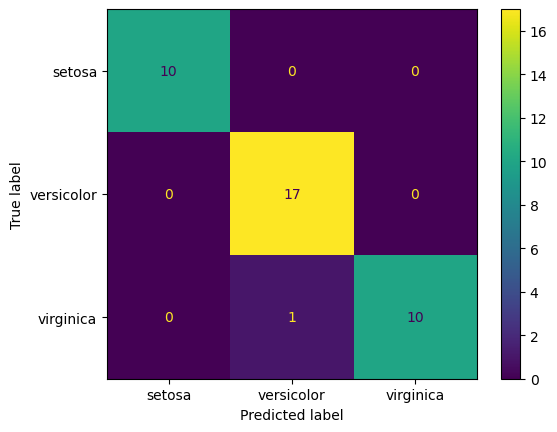

In [135]:
ConfusionMatrixDisplay.from_predictions(y_test , y_pred )

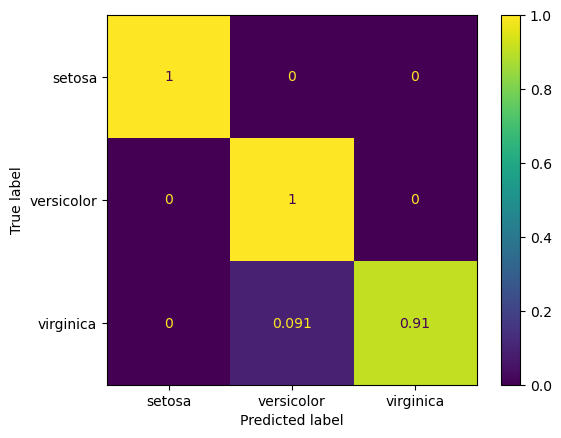

In [133]:
ConfusionMatrixDisplay.from_predictions(y_test , y_pred , normalize='true')

# ROC plot & Curve

In [138]:
from sklearn.metrics import roc_curve , auc

In [162]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
     y_score = clf.decision_function(X_test)
     # structures
     fpr = dict()
     tpr = dict()
     roc_auc = dict()
     # calculate dummies once
     y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
     for i in range(n_classes):
         fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
         roc_auc[i] = auc(fpr[i], tpr[i])
     # roc for each class
     fig, ax = plt.subplots(figsize=figsize)
     ax.plot([0, 1], [0, 1], 'k--')
     ax.set_xlim([0.0, 1.0])
     ax.set_ylim([0.0, 1.05])
     ax.set_xlabel('False Positive Rate')
     ax.set_ylabel('True Positive Rate')
     ax.set_title('Receiver operating characteristic example')
     for i in range(n_classes):
         ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
     ax.legend(loc="best")
     ax.grid(alpha=.4)
     sns.despine()
     plt.show()

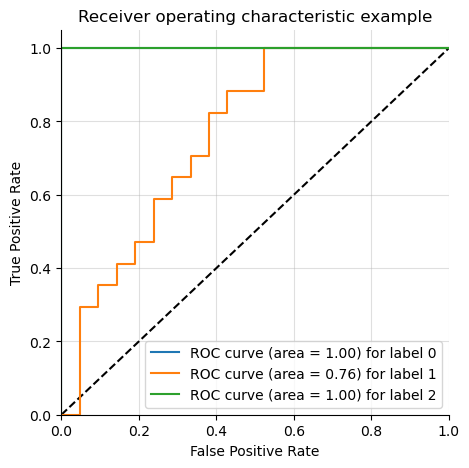

In [164]:
plot_multiclass_roc(grid_model , X_test , y_test , n_classes=3)